In [71]:
import numpy as np
import matplotlib.pyplot as plt

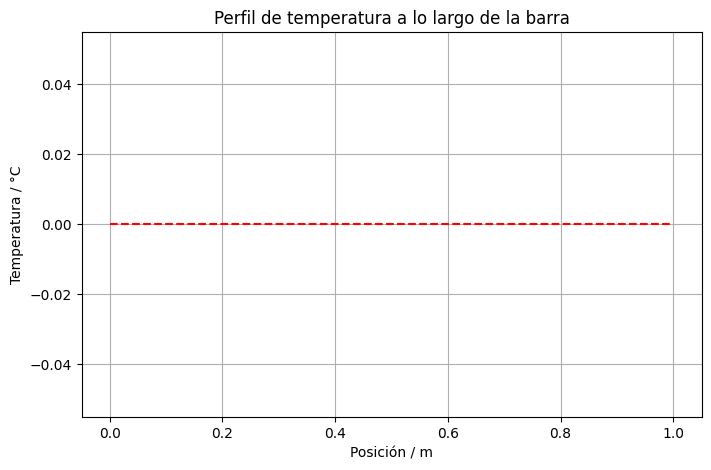

In [72]:
# Paso 00: discretizar el dominio espacial
x0 = 0; L = 1; dx = 0.02
x = np.arange(x0, L+dx, dx)

# Paso 01: discretizar el dominio temporal
t0 = 0; tf = 1000.0; dt = 0.05
t = np.arange(t0, tf+dt, dt)

# Paso 02: inicializar vector temperatura del presente
TPre = np.zeros(len(x))

# Paso 04: llenar el vector de presente con las condiciones inciales
TPre[:] = 0.0 # Celsius

# Paso 05: graficar para verificar las condiciones inciales
plt.figure(1,figsize=(8,5))
plt.plot(x,TPre,"--r")
plt.title("Perfil de temperatura a lo largo de la barra")
plt.xlabel("Posición / m")
plt.ylabel("Temperatura / °C")
plt.grid()

In [73]:
# Paso 06: crear vector para almacenar las temperatura futuras
TFut = np.zeros(len(x))

# Paso 07: propiedades del material:
n2 = 25     # hP/A.k   1/m2
alpha = 117e-6 # Difusividad térmica m2/s
Tinf = 20 # Celsius
Tb = 100  # Celsius

# Paso 08: incializar sistema de ecuaciones lineales
incog = len(x)
matrizA = np.zeros((incog,incog))
vectorB = np.zeros(incog)

# Paso 09: crear coeficientes
F = (dt*alpha)/(2*dx**2)
beta = (alpha*dt*n2)/2


In [74]:
for n in range(0,len(t)):
  for i in range(0,incog):
    if i == 0:
        matrizA[i,i] = 1
    elif i > 0 and i < incog - 1:
        matrizA[i,i-1] = -F
        matrizA[i,i] = 1 + 2*F + beta
        matrizA[i,i+1] = -F
    else:
        matrizA[i,i-1] = -2*F
        matrizA[i,i] = 1 + 2*F + beta

np.set_printoptions(formatter={'float':"{0:0.6f}".format})
#print(matrizA)

In [75]:
for n in range(0,len(t)):
  for i in range(0,incog):
    if i == 0:
      vectorB[i] = Tb
    elif i > 0 and i < incog - 1:
      vectorB[i] = F*TPre[i-1] + (1 - 2*F - beta)*TPre[i] + F*TPre[i+1] + 2*beta*Tinf
    else:
      vectorB[i] = 2*F*TPre[i-1] + (1 - 2*F - beta)*TPre[i] + 2*beta*Tinf
  #print(vectorB)

  TFut[:] = np.linalg.solve(matrizA,vectorB)
  TPre = TFut.copy()

np.set_printoptions(formatter={'float':"{0:0.6f}".format})


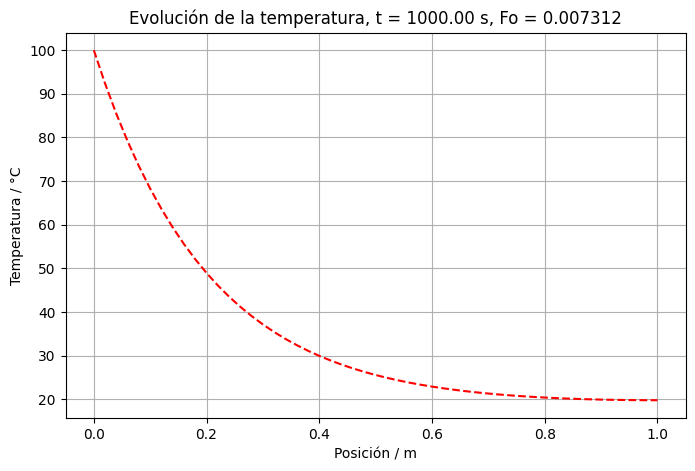

In [76]:
# Paso 10: graficar
plt.figure(1,figsize=(8,5))
plt.plot(x,TFut,"--r")
plt.title("Evolución de la temperatura, t = {:.2f} s, Fo = {:.6f}".format(t[-1],F))
plt.xlabel("Posición / m")
plt.ylabel("Temperatura / °C")
plt.grid()

In [77]:
# Solución analítica
m = np.sqrt(n2)
TempAnalit = (Tb-Tinf)*(np.cosh(m*(L-x)))/(np.cosh(m*L)) + Tinf

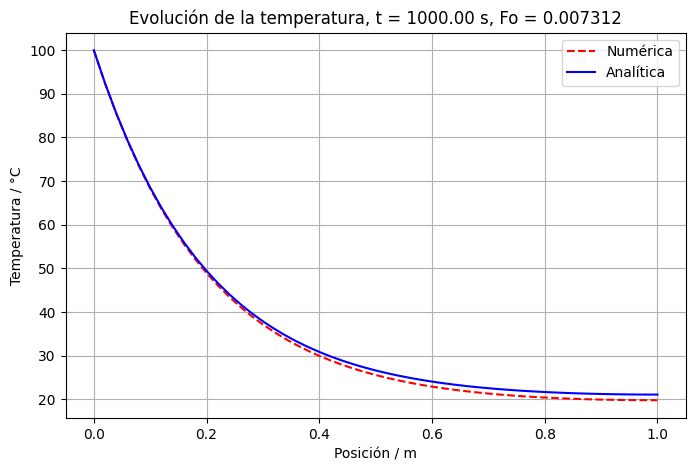

In [78]:
plt.figure(2,figsize=(8,5))
plt.plot(x,TFut,"--r",label = "Numérica")
plt.plot(x,TempAnalit,"-b",label="Analítica")
plt.title("Evolución de la temperatura, t = {:.2f} s, Fo = {:.6f}".format(t[-1],F))
plt.xlabel("Posición / m")
plt.ylabel("Temperatura / °C")
plt.legend()
plt.grid()